In [1]:
%run ../__init__.py

In [2]:
%matplotlib inline

In [4]:
budget = pd.read_csv('../data/budget_test.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
budget_test = pd.DataFrame(budget)

In [6]:
budget_test.head()

,Unnamed: 0,Object_Description,Program_Description,SubFund_Description,Job_Title_Description,Facility_or_Department,Sub_Object_Description,Location_Description,FTE,Function_Description,Position_Extra,Text_4,Total,Text_2,Text_3,Fund_Description,Text_1
0,180042,Student Meals/Room/Other,Basic Educational Services,NaN,NaN,NaN,Line Item that is paid with Campus' money,School,NaN,Instruction,NaN,NaN,3999.910000,NaN,NaN,General Fund,NaN
1,28872,Extra Duty/Signing Bonus Pay,Undistributed,NaN,CHEERLEADER DIR,NaN,General,School,NaN,Cocurricular & Extra Curricular Activities,NaN,NaN,3447.320213,NaN,NaN,General Fund,NaN
2,186915,Professional Salaries,Bilingual Education,NaN,T-EL 1ST BIL,NaN,General,School,1.0,Instruction,NaN,NaN,52738.780869,NaN,NaN,General Fund,NaN
3,412396,Professional Salaries,Bilingual Education,NaN,T-EL 2ND BIL,NaN,General,School,1.0,Instruction,NaN,NaN,69729.263191,NaN,NaN,General Fund,NaN
4,427740,Salaries for Support Personnel,Undistributed,NaN,CLERK III- SCH,NaN,General,School,1.0,School Leadership,NaN,NaN,29492.834215,NaN,NaN,General Fund,NaN


In [8]:
budget_test.columns = ['ID' if x=='Unnamed: 0' else x for x in budget_test.columns]

In [9]:
budget_test.shape

(50064, 17)

In [11]:
budget_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50064 entries, 0 to 50063
Data columns (total 17 columns):
ID                        50064 non-null int64
Object_Description        48330 non-null object
Program_Description       44811 non-null object
SubFund_Description       16111 non-null object
Job_Title_Description     32317 non-null object
Facility_or_Department    2839 non-null object
Sub_Object_Description    33612 non-null object
Location_Description      37316 non-null object
FTE                       19605 non-null float64
Function_Description      46866 non-null object
Position_Extra            13813 non-null object
Text_4                    2814 non-null object
Total                     49404 non-null float64
Text_2                    4641 non-null object
Text_3                    9486 non-null object
Fund_Description          39586 non-null object
Text_1                    15378 non-null object
dtypes: float64(2), int64(1), object(14)
memory usage: 6.5+ MB


In [12]:
# budget_df = budget_df.drop('ID', axis=1)

In [13]:
targets = ['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type',
       'Position_Type', 'Object_Type', 'Pre_K', 'Operating_Status']

In [15]:
predictors = [col for col in budget_test.columns if col not in targets]
word_predictors = ['Object_Description','Text_2','SubFund_Description','Job_Title_Description','Text_3','Text_4',
                   'Sub_Object_Description','Location_Description','Function_Description','Facility_or_Department','Position_Extra',
                   'Program_Description','Fund_Description','Text_1']

num_predictors = ['FTE', 'Total']

### Change label columns, append category names to labels

In [20]:
budget_test.columns

Index(['ID', 'Object_Description', 'Program_Description',
       'SubFund_Description', 'Job_Title_Description',
       'Facility_or_Department', 'Sub_Object_Description',
       'Location_Description', 'FTE', 'Function_Description', 'Position_Extra',
       'Text_4', 'Total', 'Text_2', 'Text_3', 'Fund_Description', 'Text_1'],
      dtype='object')

In [12]:
budget_df[targets].head()

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status
0,Teacher Compensation,Instruction,School Reported,School,NO_LABEL,Teacher,NO_LABEL,NO_LABEL,PreK-12 Operating
1,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating
2,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,Non PreK,PreK-12 Operating
3,Substitute Compensation,Instruction,School Reported,School,Unspecified,Substitute,Benefits,NO_LABEL,PreK-12 Operating
4,Substitute Compensation,Instruction,School Reported,School,Unspecified,Teacher,Substitute Compensation,NO_LABEL,PreK-12 Operating


In [13]:
categorize_label = lambda x: x.astype('category')
budget_df[targets] = budget_df[targets].apply(categorize_label, axis=0)

### Find NaN and fill NaN values for text columns with empty strings

In [22]:
for col in budget_test[word_predictors]:
    budget_test[col] = budget_test[col].replace({"n/a": ''})

In [24]:
budget_test[predictors].isnull().sum().sort_values()

ID                            0
Total                       660
Object_Description         1734
Function_Description       3198
Program_Description        5253
Fund_Description          10478
Location_Description      12748
Sub_Object_Description    16452
Job_Title_Description     17747
FTE                       30459
SubFund_Description       33953
Text_1                    34686
Position_Extra            36251
Text_3                    40578
Text_2                    45423
Facility_or_Department    47225
Text_4                    47250
dtype: int64

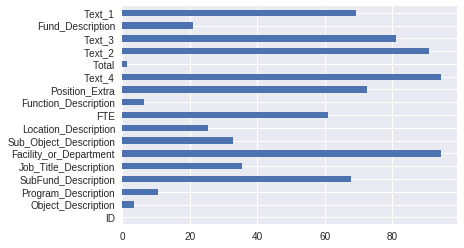

In [26]:
_ = (budget_test[predictors].isnull().sum()/budget_test[predictors].shape[0]*100).plot(kind='barh')

In [28]:
for col in budget_test[word_predictors]:
    budget_test[col] = budget_test[word_predictors].loc[:,[col]].fillna(' ')

In [30]:
budget_test[predictors].isnull().sum()

ID                            0
Object_Description            0
Program_Description           0
SubFund_Description           0
Job_Title_Description         0
Facility_or_Department        0
Sub_Object_Description        0
Location_Description          0
FTE                       30459
Function_Description          0
Position_Extra                0
Text_4                        0
Total                       660
Text_2                        0
Text_3                        0
Fund_Description              0
Text_1                        0
dtype: int64

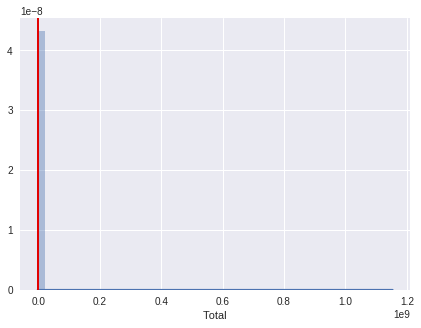

In [32]:
plt.figure(1, figsize=(7,5))
_ = sns.distplot(budget_test['Total'].dropna())
plt.axvline(budget_test['Total'].median(), c='black')
plt.axvline(budget_test['Total'].mean(), c='red')

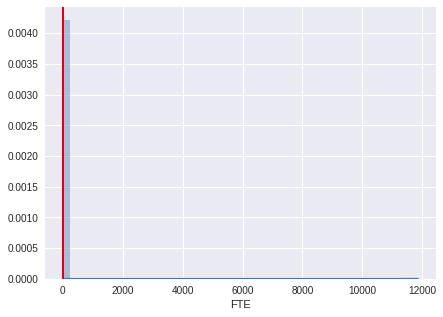

In [33]:
plt.figure(1, figsize=(7,5))
_ = sns.distplot(budget_test['FTE'].dropna())
plt.axvline(budget_test['FTE'].median(), c='black')
plt.axvline(budget_test['FTE'].mean(), c='red')

In [34]:
# all values less than 0 becomes 0 and values greater than 1 becomes 1
# values greater than 1 and less than 1 were incorrect and skewing the the mean, so clipped them
budget_test['FTE'] = np.clip(budget_test['FTE'],0,1)

## Impute values for numerical columns

Fill 'Total' column with mean value since graph shows that values are normally distributed where mean and median are the same

In [25]:
from sklearn.preprocessing import Imputer

In [26]:
imputer = Imputer()
budget_df[num_predictors]=imputer.fit_transform(budget_df[num_predictors])

## Data cleaning for word predictor columns

In [27]:
import re
from spacy.en import English
from nltk.stem.porter import PorterStemmer
import nltk
from nltk.corpus import stopwords
from spacy.en import STOP_WORDS
nlp = English()

In [28]:
for col in budget_df[word_predictors]:
    budget_df[col] = budget_df[col].str.lower()

In [29]:
for col in budget_df[word_predictors]:
    budget_df[col] = budget_df[col].replace({"n/a": 'na'})

In [30]:
def cleaner(text):
    text = re.sub('[^a-zA-Z0-9]',' ',text)
    text = re.sub("\\s+", " ", text)
    text = ' '.join(i.lemma_ for i in nlp(text)
                    if i.orth_ not in STOP_WORDS)
    return text

In [32]:
for col in budget_df[word_predictors]:
    budget_df[col] = budget_df[col].apply(cleaner)
    print(col)

Object_Description
Text_2
SubFund_Description
Job_Title_Description
Text_3
Text_4
Sub_Object_Description
Location_Description
Function_Description
Facility_or_Department
Position_Extra
Program_Description
Fund_Description
Text_1


In [33]:
unique_values = []
for col in budget_df[word_predictors]:
    unique_vals = budget_df[col].nunique()
    unique_values.append({'column_name': col,
                        'unique_vals': unique_vals})

In [34]:
pd.DataFrame(unique_values)

,column_name,unique_vals
0,Object_Description,537
1,Text_2,277
2,SubFund_Description,266
3,Job_Title_Description,3127
4,Text_3,36
5,Text_4,236
6,Sub_Object_Description,161
7,Location_Description,343
8,Function_Description,627
9,Facility_or_Department,173


In [35]:
budget_df['combined_text'] = budget_df[word_predictors].apply(lambda x: " ".join(x), axis=1)

In [36]:
def value_counts(col):
    counts = budget_df[col].value_counts()
    percent = budget_df[col].value_counts(normalize=True)
    return pd.DataFrame({'counts': counts, 
                         'percent': percent})

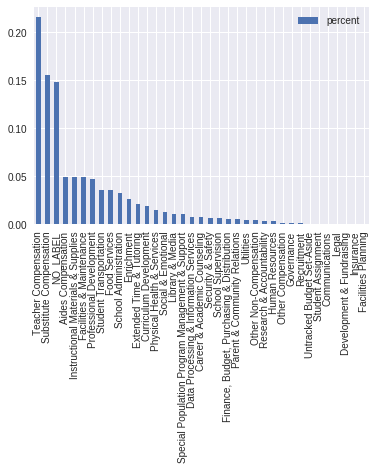

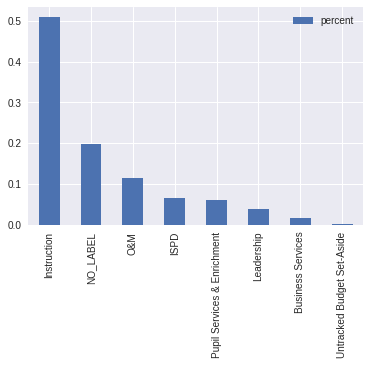

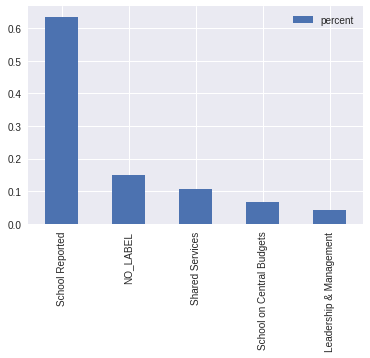

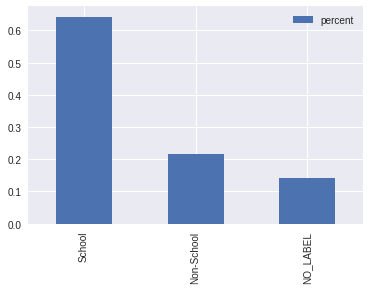

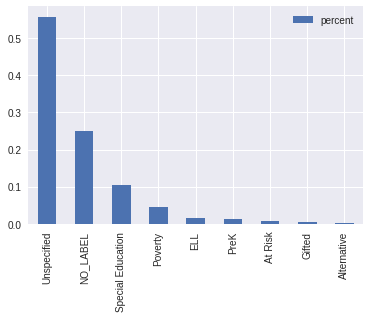

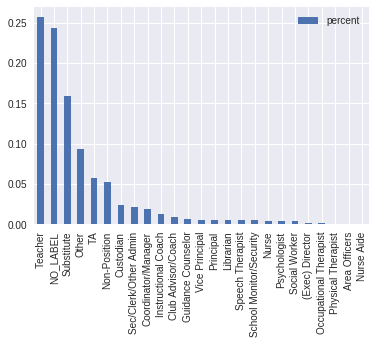

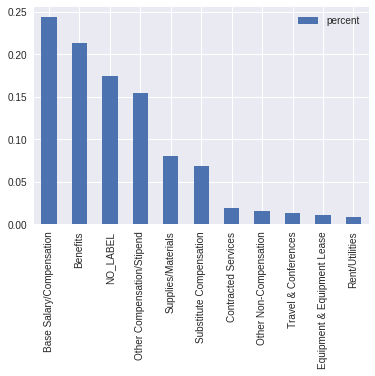

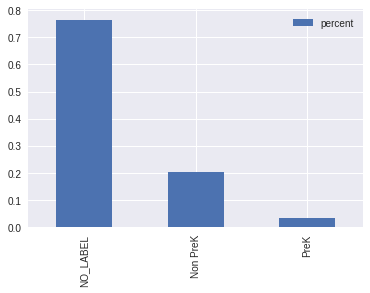

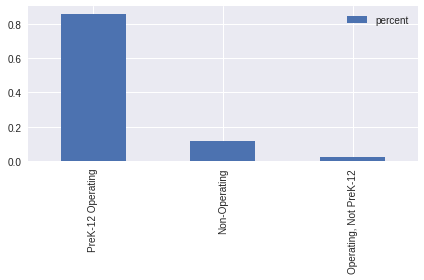

In [37]:
for i, col in enumerate(budget_df[targets]):
    col = value_counts(col)
    col[['percent']].plot.bar()
    
plt.tight_layout()

In [38]:
budget_df.to_csv('../data/budget_df_cleaned2.csv')